In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pylab as plt
import re

In [2]:
data = pd.read_csv("sg_hitch_data_updated.csv", index_col=0)
data.head()

,drop_off,number_of_pax,pick_up,post_date,post_time,raw_message,request_date,request_time,user,user_type
0,punggol,nil,alexandra/mbc/arc/vivo areas,26.02.2019,14:40:47,driver looking for hitchers<br/>pick up: alexa...,nil,nil,Stallion13,driver
1,bedok reservoir,nil,tuas area,26.02.2019,14:55:47,driver looking for hitchers<br/>pick up: tuas ...,nil,nil,xoxoxo,driver
2,off - ntu,nil,up - mountbatten mrt,26.02.2019,15:00:23,hitcher looking for drivers<br/>pick up - moun...,nil,nil,Amanda,hitcher
3,north-east,nil,bedok/tamp/pasir ris/eunos,26.02.2019,15:39:19,driver looking for hitchers<br/>pick up: bedok...,nil,nil,J,driver
4,north-east or east,nil,jurong,26.02.2019,18:12:47,driver looking for hitchers<br/>pick up: juron...,nil,nil,Colonel Ronald Silver,driver


In [3]:
print("Total number of ride requests: ", len(data))

Total number of ride requests:  349801


Number of hitchers: 	 271484 		Percentage:  77.61 %
Number of drivers: 	 78317 		Percentage:  22.39 %


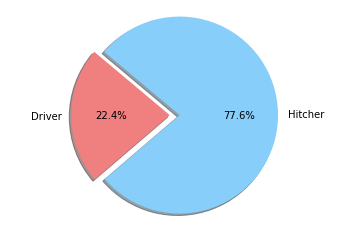

In [4]:
user_type = data['user_type']
user_type_count = Counter(user_type)
print("Number of hitchers: \t", user_type_count['hitcher'], "\t\tPercentage: ", round(user_type_count['hitcher']/len(data)*100, 2), "%")
print("Number of drivers: \t", user_type_count['driver'], "\t\tPercentage: ", round(user_type_count['driver']/len(data)*100, 2), "%")

labels = 'Driver', 'Hitcher'
sizes = [user_type_count['driver'], user_type_count['hitcher']]
colors = ['lightcoral', 'lightskyblue']
explode_driver = 0
explode_hitcher = 0
index = sizes.index(max(sizes))
if index == 0:
    explode_driver = 0.1
else:
    explode_hitcher = 0.1
explode = (explode_driver, explode_hitcher)  # explode max slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

### Filter out corrupted data

In [5]:
# Filter out corrupted request time
clean_data_rt = data[data.request_time != "nil"]
print("Removed", len(data)-len(clean_data_rt), "corrupted request time")
# Filter out corrupted request date
clean_data_rd = clean_data_rt[clean_data_rt.request_date != "nil"]
clean_date_rd_2nd = clean_data_rd[clean_data_rd.request_date.str.contains(r'\d\d.\d\d.\d\d\d\d')]
print("Removed", len(clean_data_rt)-len(clean_date_rd_2nd), "corrupted request date")
# Filter out corrupted pick up
clean_data_pu = clean_date_rd_2nd[clean_date_rd_2nd.pick_up != "nil"]
print("Removed", len(clean_data_rd)-len(clean_data_pu), "corrupted pick up")
# Filter out corrupted drop off
clean_data_do = clean_data_pu[clean_data_pu.drop_off != "nil"]
print("Removed", len(clean_data_pu)-len(clean_data_do), "corrupted drop off")

Removed 42303 corrupted request time
Removed 13218 corrupted request date
Removed 957 corrupted pick up
Removed 1768 corrupted drop off


In [6]:
clean_data = clean_data_do
print("Number of requests left: ", len(clean_data))
print()
print("Percentage of non-corrupted data: ", round(len(clean_data)/len(data)*100, 2), "%")

Number of requests left:  292432

Percentage of non-corrupted data:  83.6 %


In [13]:
source_destination = []

for i in range(len(pick_up)):
    source_destination.append(str(pick_up[i])+" - "+str(drop_off[i]))

In [14]:
Counter(source_destination).most_common(20)

[('town - anywhere', 407),
 ('yishun - anywhere', 349),
 ('woodlands - anywhere', 320),
 ('yishun - woodlands', 271),
 ('woodlands - yishun', 227),
 ('jurong - anywhere', 216),
 ('tampines - yishun', 214),
 ('tampines - woodlands', 213),
 ('woodlands - town', 204),
 ('woodlands - tampines', 202),
 ('punggol - woodlands', 200),
 ('yishun - town', 190),
 ('tampines - anywhere', 189),
 ('sengkang - woodlands', 185),
 ('bedok - punggol', 177),
 ('pasir ris - yishun', 176),
 ('yishun - tampines', 175),
 ('bedok - hougang', 174),
 ('hougang - yishun', 173),
 ('yishun - hougang', 170)]

In [8]:
pick_up = clean_data['pick_up'].to_list()

In [9]:
Counter(pick_up).most_common(20)

[('woodlands', 6834),
 ('yishun', 6352),
 ('tampines', 5504),
 ('sengkang', 5483),
 ('punggol', 4565),
 ('hougang', 4491),
 ('pasir ris', 4162),
 ('cck', 3518),
 ('amk', 3478),
 ('jurong west', 3321),
 ('bedok', 2979),
 ('jurong', 2655),
 ('sembawang', 2512),
 ('bukit batok', 2502),
 ('bukit panjang', 2325),
 ('town', 1480),
 ('serangoon', 1378),
 ('clarke quay', 1320),
 ('clementi', 1303),
 ('bugis', 1216)]

In [10]:
drop_off = clean_data['drop_off'].to_list()

In [11]:
Counter(drop_off).most_common(20)

[('anywhere', 7678),
 ('woodlands', 6464),
 ('yishun', 6110),
 ('tampines', 5312),
 ('sengkang', 4902),
 ('punggol', 4647),
 ('hougang', 4405),
 ('pasir ris', 3883),
 ('jurong west', 3304),
 ('amk', 3178),
 ('cck', 3084),
 ('bedok', 2920),
 ('jurong', 2867),
 ('bukit batok', 2330),
 ('sembawang', 2303),
 ('bukit panjang', 2301),
 ('town', 2063),
 ('clementi', 1506),
 ('ngee ann poly', 1296),
 ('serangoon', 1257)]

In [15]:
user = clean_data['user']

In [16]:
Counter(user).most_common()

[('Deleted Account', 1611),
 ('J', 1250),
 ('Jonathan Ng', 997),
 ('.', 854),
 ('A', 628),
 ('Elizabeth', 572),
 ('J.K', 536),
 ('Joe', 535),
 ('Ck', 535),
 ('-', 498),
 ('🍍💙❣️[Mr]OngLai❣️💛🍍', 488),
 ('sihui', 472),
 ('Cass', 458),
 ('Tasha 💋', 432),
 ('Cheryl', 427),
 ('Rachel', 417),
 ('Ryan', 411),
 ('Ben', 403),
 ('Darren', 393),
 ('Jason', 363),
 ('Shanice 🥀', 350),
 ('Alex', 345),
 ('Xavier', 345),
 ('Esther Vidya', 343),
 ('🐒GasMonkey', 329),
 ('Joe .', 316),
 ('Yx', 314),
 ('Marcus', 310),
 ('杨', 308),
 ('Lucas', 306),
 ('D', 304),
 ('Nadia Yeo', 304),
 ('Honda VEZEL', 302),
 ('Alvin', 299),
 ('Nicole', 297),
 ('V', 296),
 ('🍒', 296),
 ('GetICEDwithMe', 279),
 ('Xhy’🧸', 267),
 ('Sarah', 266),
 ('Edwin', 265),
 ('Aaron', 264),
 ('Shawn', 264),
 ('Bryan', 262),
 ('d', 256),
 ('Jay Rav', 253),
 ('Dan', 252),
 ('Daniel', 252),
 ('Kenneth', 251),
 ('Kai', 250),
 ('𝕮𝖑𝖆𝖗𝖎𝖘𝖘𝖆 𝕯𝖆𝖓𝖎𝖊𝖑𝖑𝖊', 250),
 ('James', 248),
 ('Hui Min', 247),
 ('Melvin', 247),
 ('Meow meow', 244),
 ('Nic', 242),
 ('A

In [17]:
request_date = clean_data['request_date']

In [18]:
request_date.unique()

array(['25.03.2019', '26.03.2019', '27.03.2019', '28.03.2019',
       '06.07.2019', '07.07.2019', '08.07.2019', '09.07.2019',
       '10.07.2019', '11.07.2019', '29.03.2019', '30.03.2019',
       '31.03.2019', '12.07.2019', '13.07.2019', '14.07.2019',
       '07.25.2019', '32.03.2019', '01.04.2019', '02.04.2019',
       '03.04.2019', '04.04.2019', '15.07.2019', '16.07.2019',
       '17.07.2019', '18.07.2019', '05.04.2019', '06.04.2019',
       '07.04.2019', '19.07.2019', '20.07.2019', '21.07.2019',
       '22.24.2019', '22.07.2019', '12.15.2019', '08.04.2019',
       '09.04.2019', '10.04.2019', '11.04.2019', '09.30.2019',
       '23.07.2019', '24.07.2019', '25.07.2019', '26.07.2019',
       '27.07.2019', '29.07.2019', '28.07.2019', '12.04.2019',
       '13.04.2019', '30.07.2019', '31.07.2019', '32.07.2019',
       '01.08.2019', '02.08.2019', '03.08.2019', '14.04.2019',
       '14.02.2019', '15.04.2019', '16.04.2019', '17.04.2019',
       '04.08.2019', '05.08.2019', '06.08.2019', '07.08

In [19]:
request_time = clean_data['request_time']

In [20]:
Counter(request_time).most_common(10)

[('18:00', 2963),
 ('18:30', 2040),
 ('17:30', 1964),
 ('22:00', 1945),
 ('19:00', 1838),
 ('17:00', 1755),
 ('23:00', 1711),
 ('08:00', 1653),
 ('22:30', 1640),
 ('21:00', 1610)]

In [21]:
no_of_pax = clean_data['number_of_pax']

In [22]:
Counter(no_of_pax).most_common(10)

[('1', 185706),
 ('2', 44420),
 ('nil', 12660),
 ('3', 10839),
 ('1-2', 10253),
 ('1-3', 10221),
 ('1-4', 9743),
 ('4', 5937),
 ('5', 753),
 ('1-6', 461)]